# Do Blue Zone diets work in Berkeley?

##### Blue Zones are areas of the world where people live much longer than the rest of the population and there are only 5 Blue Zones in the world in countries such as Greece, Italy, Japan, USA, and Costa Rica. The longevity of the population is a reflection of the their culture, community, and most importantly diets since they all tend to lead healthy lifestyles. 
##### Our group wants to see how feasible it would be to eat a Blue Zone diet as Berkeley students as compared to our typical diets. To do this, we are testing a typical Mediterranean diet, eaten in Ikaria, Greece, and an Okinawa, Japan diet against a typical Berkeley student's diet to see which has the lowest price and most nutritional value.
##### In order to make a standard comparison in prices and tailor it to the feasibility of a Berkeley student, we decided to get our price information from Safeway on Shattuck Avenue on the Northside of Berkeley using their website. Also for the sake of standards and lowest costs, we inputted the lowest price of item that was available at Safeway.
##### The main takeaway that our group wants to know is if it would be financially viable to eat these healthy, life sustaining diets in Berkeley and if typical Berkeley students can eat this diet to potential increase the longevity of their lives.
##### We gathered the typical food items of each of there diets through online research and our own personal experiences.

### Package Installments

In [22]:
apikey =  "DEMO_KEY"  # Replace with a real key!  "DEMO_KEY" will be slow...

In [34]:
#checking that we are in the correct working directory
!pwd

#installing neccesary packages and access to fdc data 

!pip install -r requirements.txt #--upgrade
%pip install gnupg
%pip install pandas

from  scipy.optimize import linprog as lp
import numpy as np
import pandas as pd

import fooddatacentral as fdc
import warnings
from eep153_tools.sheets import read_sheets

/home/jovyan/EEP153_Materials/Project2
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Dietary Reference Intakes

In [10]:
#Read diet minimum data
diet_min = pd.read_csv("diet_minimums.csv")
#drop unneeded columns 
diet_min = diet_min.drop(columns=["Unnamed: 0"])
diet_min = diet_min.set_index('Nutrition')

diet_min

,Source,C 1-3,F 4-8,M 4-8,F 9-13,M 9-13,F 14-18,M 14-18,F 19-30,M 19-30,F 31-50,M 31-50,F 51+,M 51+
Nutrition,,,,,,,,,,,,,,
Energy,---,1000.0,1200.0,1400.0,1600.0,1800.0,1800.0,2200.0,2000.0,2400.0,1800.0,2200.0,1600.0,2000.0
Protein,RDA,13.0,19.0,19.0,34.0,34.0,46.0,52.0,46.0,56.0,46.0,56.0,46.0,56.0
"Fiber, total dietary",---,14.0,16.8,19.6,22.4,25.2,25.2,30.8,28.0,33.6,25.2,30.8,22.4,28.0
"Folate, DFE",RDA,150.0,200.0,200.0,300.0,300.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0
"Calcium, Ca",RDA,700.0,1000.0,1000.0,1300.0,1300.0,1300.0,1300.0,1000.0,1000.0,1000.0,1000.0,1200.0,1000.0
"Carbohydrate, by difference",RDA,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0
"Iron, Fe",RDA,7.0,10.0,10.0,8.0,8.0,15.0,11.0,18.0,8.0,18.0,8.0,8.0,8.0
"Magnesium, Mg",RDA,80.0,130.0,130.0,240.0,240.0,360.0,410.0,310.0,400.0,320.0,420.0,320.0,420.0
Niacin,RDA,6.0,8.0,8.0,12.0,12.0,14.0,16.0,14.0,16.0,14.0,16.0,14.0,16.0


In [14]:
from eep153_tools.sheets import read_sheets

DRI_url = "https://docs.google.com/spreadsheets/d/1y95IsQ4HKspPW3HHDtH7QMtlDA66IUsCHJLutVL-MMc/"

DRIs = read_sheets(DRI_url)

# Define *maximums*
diet_max = DRIs['diet_maximums'].set_index('Nutrition')
diet_max

Key available for students@eep153.iam.gserviceaccount.com.


/srv/conda/lib/python3.9/site-packages/eep153_tools/sheets.py:150: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  D[w.title]=df.apply(lambda x: pd.to_numeric(x,errors='ignore'))


,Source,C 1-3,F 4-8,M 4-8,F 9-13,M 9-13,F 14-18,M 14-18,F 19-30,M 19-30,F 31-50,M 31-50,F 51+,M 51+
Nutrition,,,,,,,,,,,,,,
"Sodium, Na",UL,1500,1900,1900,2200,2200,2300,2300,2300,2300,2300,2300,2300,2300
Energy,,2500,2500,2500,2800,3000,3100,3100,3100,3100,3100,3100,3100,3100


In [15]:
def dietary_ref_intake(age,sex,df):
    """Takes in age and sex, and returns the dietary reference intake for the chosen population"""

    if age <= 3:
        col = 'C 1-3'
    age_ranges = [(4,8),(9,13),(14,18),(19,30),(31,50),(50,100)]
    for age_range in age_ranges:
        if age >= age_range[0] and age <= age_range[1]:
            col = sex + ' ' + str(age_range[0]) + '-' + str(age_range[1])
    return pd.Series(df[col]) 

In [16]:
# Example of minimum dietary requirements for a male aged 21
dietary_ref_intake(age=21,sex='F',df=diet_min)

Nutrition
Energy                            2000.0
Protein                             46.0
Fiber, total dietary                28.0
Folate, DFE                        400.0
Calcium, Ca                       1000.0
Carbohydrate, by difference        130.0
Iron, Fe                            18.0
Magnesium, Mg                      310.0
Niacin                              14.0
Phosphorus, P                      700.0
Potassium, K                      4700.0
Riboflavin                           1.1
Thiamin                              1.1
Vitamin A, RAE                     700.0
Vitamin B-12                         2.4
Vitamin B-6                          1.3
Vitamin C, total ascorbic acid      75.0
Vitamin E (alpha-tocopherol)        15.0
Vitamin K (phylloquinone)           90.0
Zinc, Zn                             8.0
Name: F 19-30, dtype: float64

## Function to Solve Lowest Cost

In [36]:
def solve_subsistence_problem(FoodNutrients,Prices,dietmin,dietmax,max_weight=None,tol=1e-6):
    """Solve Stigler's Subsistence Cost Problem.

    Inputs:
       - FoodNutrients : A pd.DataFrame with rows corresponding to foods, columns to nutrients.
       - Prices : A pd.Series of prices for different foods
       - diet_min : A pd.Series of DRIs, with index corresponding to columns of FoodNutrients,
                    describing minimum intakes.
       - diet_max : A pd.Series of DRIs, with index corresponding to columns of FoodNutrients,
                    describing maximum intakes.
       - max_weight : Maximum weight (in hectograms) allowed for diet.
       - tol : Solution values smaller than this in absolute value treated as zeros.
       
    """
    try: 
        p = Prices.apply(lambda x:x.magnitude)
    except AttributeError:  # Maybe not passing in prices with units?
        warnings.warn("Prices have no units.  BE CAREFUL!  We're assuming prices are per hectogram or deciliter!")
        p = Prices

    p = p.dropna()

    # Compile list that we have both prices and nutritional info for; drop if either missing
    use = p.index.intersection(FoodNutrients.columns)
    p = p[use]

    # Drop nutritional information for foods we don't know the price of,
    # and replace missing nutrients with zeros.
    Aall = FoodNutrients[p.index].fillna(0)

    # Drop rows of A that we don't have constraints for.
    Amin = Aall.loc[Aall.index.intersection(dietmin.index)]
    Amin = Amin.reindex(dietmin.index,axis=0)
    idx = Amin.index.to_frame()
    idx['type'] = 'min'
    #Amin.index = pd.MultiIndex.from_frame(idx)
    #dietmin.index = Amin.index
    
    Amax = Aall.loc[Aall.index.intersection(dietmax.index)]
    Amax = Amax.reindex(dietmax.index,axis=0)
    idx = Amax.index.to_frame()
    idx['type'] = 'max'
    #Amax.index = pd.MultiIndex.from_frame(idx)
    #dietmax.index = Amax.index

    # Minimum requirements involve multiplying constraint by -1 to make <=.
    A = pd.concat([Amin,
                   -Amax])

    b = pd.concat([dietmin,
                   -dietmax]) # Note sign change for max constraints

    # Make sure order of p, A, b are consistent
    A = A.reindex(p.index,axis=1)
    A = A.reindex(b.index,axis=0)

    if max_weight is not None:
        # Add up weights of foods consumed
        A.loc['Hectograms'] = -1
        b.loc['Hectograms'] = -max_weight
        
    # Now solve problem!  (Note that the linear program solver we'll use assumes
    # "less-than-or-equal" constraints.  We can switch back and forth by
    # multiplying $A$ and $b$ by $-1$.)

    result = lp(p, -A, -b, method='highs')

    result.A = A
    result.b = b
    
    if result.success:
        result.diet = pd.Series(result.x,index=p.index)
    else: # No feasible solution?
        warnings.warn(result.message)
        result.diet = pd.Series(result.x,index=p.index)*np.nan  

    return result

## Generic Berkeley Student Diet

#### Prices for Generic Berkeley Diet

In [23]:
SHEETs = [# BERKELEY DIET foods, Berkeley prices
          ("https://docs.google.com/spreadsheets/d/11Ou4aZ8bE12J6dY9hmyUeCFFCNpplexnOGtfJVKdgbY/edit#gid=628663795","GENERIC"),
         ]

In [26]:
df = read_sheets(SHEETs[0][0])[SHEETs[0][1]]
df
df['FDC'] = pd.to_numeric(df['FDC'], errors='coerce').fillna(0).astype(int).dropna()

print(df)

Key available for students@eep153.iam.gserviceaccount.com.


/srv/conda/lib/python3.9/site-packages/eep153_tools/sheets.py:150: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  D[w.title]=df.apply(lambda x: pd.to_numeric(x,errors='ignore'))


        FDC                  Food  Quantity Units  Price                      \
0   2646170        Chicken Breast         1   lbs   4.99 NaN NaN NaN NaN NaN   
1   2100593        Chicken Thighs         1   lbs   2.99 NaN NaN NaN NaN NaN   
2   1990910  Ground Chicken (96%)         1   lbs   8.69 NaN NaN NaN NaN NaN   
3   2033779   Ground Turkey (93%)         1   lbs   3.99 NaN NaN NaN NaN NaN   
4   2546569  Smoked Turkey Breast         1   lbs  10.99 NaN NaN NaN NaN NaN   
..      ...                   ...       ...   ...    ...  ..  ..  ..  ..  ..   
58  2343973                  oats         1   lbs   1.92 NaN NaN NaN NaN NaN   
59  1727861    honey nut cheerios         1   lbs   5.92 NaN NaN NaN NaN NaN   
60  2423848          plain bagels         1   lbs   2.56 NaN NaN NaN NaN NaN   
61  2341163    plain cream cheese         1   lbs   7.04 NaN NaN NaN NaN NaN   
62  2093809                 bacon         1   lbs   7.68 NaN NaN NaN NaN NaN   

           Iron  Vitamin A Vitamin C  


#### Nutritional Information for Berkeley Diet Foods

In [41]:
D = {}
count = 0
for food in df.Food.tolist():
    try:
        FDC = df.loc[df.Food==food,:].FDC[count]
        count+=1
        D[food] = fdc.nutrients(apikey,FDC).Quantity
    except AttributeError: 
        warnings.warn("Couldn't find FDC Code %s for food %s." % (food, FDC))        

FoodNutrients = pd.DataFrame(D,dtype=float)
FoodNutrients

,Chicken Breast,Chicken Thighs,Ground Chicken (96%),Ground Turkey (93%),Smoked Turkey Breast,Roasted Turkey Breast,Boneless Pork Loin chop,Ground Beef (80%),Steak,Pink Salmon,...,bananas,white bread,sliced cheddar cheese,potato chips,vanilla ice cream,oats,honey nut cheerios,plain bagels,plain cream cheese,bacon
Alanine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Alcohol, ethyl",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,NaN,NaN,0.00,0.00,NaN,NaN,0.0,NaN
Amino acids,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arginine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ash,1.1290,NaN,NaN,NaN,NaN,NaN,1.074,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vitamin K (Menaquinone-4),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vitamin K (phylloquinone),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.10,0.20,NaN,NaN,0.30,2.00,NaN,NaN,2.1,NaN
Vitamins and Other Components,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Water,74.7800,NaN,NaN,NaN,NaN,NaN,68.820,NaN,NaN,NaN,...,75.60,35.70,NaN,NaN,61.00,10.80,NaN,NaN,52.6,NaN


In [42]:
# Unit Conversion
# Convert food quantities to FDC units
df['FDC Quantity'] = df[['Quantity','Units']].T.apply(lambda x : fdc.units(x['Quantity'],x['Units']))

# Now may want to filter df by time or place--need to get a unique set of food names.
df['FDC Price'] = df['Price']/df['FDC Quantity']

df.dropna(how='any') # Drop food with any missing data

# To use minimum price observed
Prices = df.groupby('Food',sort=False)['FDC Price'].min()

/srv/conda/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1598: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  result[:] = values


#### Berkeley Result

In [43]:
group = 'M 19-30'
tol = 1e-6

result = solve_subsistence_problem(FoodNutrients,Prices,diet_min[group],diet_max[group],tol=tol)

print("Cost of diet for %s is $%4.2f per day.\n" % (group,result.fun))

# Put back into nice series
diet = result.diet

print("\nDiet (in 100s of grams or milliliters):")
print(diet[diet >= tol])  # Drop items with quantities less than precision of calculation.
print()

tab = pd.DataFrame({"Outcome":np.abs(result.A).dot(diet),"Recommendation":np.abs(result.b)})
print("\nWith the following nutritional outcomes of interest:")
print(tab)
print()

print("\nConstraining nutrients are:")
excess = tab.diff(axis=1).iloc[:,1]
print(excess.loc[np.abs(excess) < tol*100].index.tolist())

Cost of diet for M 19-30 is $7.61 per day.


Diet (in 100s of grams or milliliters):
Chicken Breast           0.010859
Carrots                  0.589016
Sweet potato             0.169720
Brussel sprouts          1.623766
Whole White Mushrooms    1.871790
Sunflower seed oil       0.292854
bananas                  4.960538
white bread              0.429467
vanilla ice cream        5.961868
oats                     0.685236
dtype: float64


With the following nutritional outcomes of interest:
                                    Outcome  Recommendation
Nutrition                                                  
Energy                          3100.000000          2400.0
Protein                           56.000000            56.0
Fiber, total dietary              33.600000            33.6
Folate, DFE                      400.000000           400.0
Calcium, Ca                     1033.233193          1000.0
Carbohydrate, by difference      356.301472           130.0
Iron, Fe                 

## Mediterranean Diet

#### Prices for Mediterranean Diet

In [44]:
mSHEETs = [# MEDITERRANEAN foods, Berkeley prices
          ("https://docs.google.com/spreadsheets/d/11Ou4aZ8bE12J6dY9hmyUeCFFCNpplexnOGtfJVKdgbY/edit#gid=628663795","MED"),
         ]

In [45]:
mdf = read_sheets(mSHEETs[0][0])[mSHEETs[0][1]]
mdf
mdf['FDC'] = pd.to_numeric(mdf['FDC'], errors='coerce').fillna(0).astype(int)

print(mdf)

Key available for students@eep153.iam.gserviceaccount.com.
        FDC                              Food  Quantity   Units  Price
0   2617829                           Spinach         1     lbs   3.99
1   2345103                              Kale         1     lbs   3.99
2   2345103                           Arugula         1     lbs   1.99
3   2345315                         Red onion         1     lbs   2.49
4   2345173                           Carrots         1     lbs   1.49
5   2344876                            Potato         1     lbs   0.80
6   2345212              Sweet potato (baked)         1     lbs   1.99
7   2345298                            Celery         1     lbs   2.99
8   2415908                              Peas         1     lbs   2.72
9   2345357  Asparagus (cooked, no added fat)         1     lbs   2.99
10  2155640                              Corn         1     lbs   2.08
11  2345304                          Cucumber         1     lbs   2.99
12   169291       

/srv/conda/lib/python3.9/site-packages/eep153_tools/sheets.py:150: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  D[w.title]=df.apply(lambda x: pd.to_numeric(x,errors='ignore'))


#### Nutritional Information for Med Diet

In [47]:
D = {}
count = 0
for food in mdf.Food.tolist():
    try:
        FDC = mdf.loc[mdf.Food==food,:].FDC[count]
        count+=1
        D[food] = fdc.nutrients(apikey,FDC).Quantity
    except AttributeError: 
        warnings.warn("Couldn't find FDC Code %s for food %s." % (food, FDC))        

FoodNutrients = pd.DataFrame(D,dtype=float)
FoodNutrients

,Spinach,Kale,Arugula,Red onion,Carrots,Potato,Sweet potato (baked),Celery,Peas,"Asparagus (cooked, no added fat)",...,tzatziki,lemon,honey,brown rice,green olives,whole wheat pita bread,eggplant,banana,minced garlic,mini sweet pepper mix
Alanine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Alcohol, ethyl",NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,0.00,...,NaN,NaN,0.00,NaN,0.00,0.00,0.00,0.00,NaN,0.00
Amino acids,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arginine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vitamin K (Menaquinone-4),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vitamin K (phylloquinone),482.4,390.00,390.00,0.40,13.20,3.90,2.30,29.30,NaN,44.60,...,NaN,NaN,0.00,NaN,1.40,1.40,3.50,0.10,NaN,7.40
Vitamins and Other Components,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Water,NaN,89.60,89.60,90.30,88.30,72.10,75.50,95.40,NaN,92.40,...,NaN,2.3,17.10,NaN,75.30,30.60,92.30,75.60,NaN,93.90


In [48]:
# Unit Conversion
# Convert food quantities to FDC units
mdf['FDC Quantity'] = mdf[['Quantity','Units']].T.apply(lambda x : fdc.units(x['Quantity'],x['Units']))

# Now may want to filter df by time or place--need to get a unique set of food names.
mdf['FDC Price'] = mdf['Price']/mdf['FDC Quantity']

mdf.dropna(how='any') # Drop food with any missing data

# To use minimum price observed
Prices = mdf.groupby('Food',sort=False)['FDC Price'].min()

/srv/conda/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1598: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  result[:] = values


#### Mediterranean Result

In [49]:
group = 'M 19-30'
tol = 1e-6

result = solve_subsistence_problem(FoodNutrients,Prices,diet_min[group],diet_max[group],tol=tol)

print("Cost of diet for %s is $%4.2f per day.\n" % (group,result.fun))

# Put back into nice series
diet = result.diet

print("\nDiet (in 100s of grams or milliliters):")
print(diet[diet >= tol])  # Drop items with quantities less than precision of calculation.
print()

tab = pd.DataFrame({"Outcome":np.abs(result.A).dot(diet),"Recommendation":np.abs(result.b)})
print("\nWith the following nutritional outcomes of interest:")
print(tab)
print()

print("\nConstraining nutrients are:")
excess = tab.diff(axis=1).iloc[:,1]
print(excess.loc[np.abs(excess) < tol*100].index.tolist())

Cost of diet for M 19-30 is $6.10 per day.


Diet (in 100s of grams or milliliters):
Arugula                      4.709654
Potato                       5.335627
Almonds, raw unsalted        0.344373
nonfat plain greek yogurt    3.428571
oats                         1.304033
dtype: float64


With the following nutritional outcomes of interest:
                                    Outcome  Recommendation
Nutrition                                                  
Energy                          2455.781088          2400.0
Protein                           83.248098            56.0
Fiber, total dietary              43.600543            33.6
Folate, DFE                      400.000000           400.0
Calcium, Ca                     1760.848281          1000.0
Carbohydrate, by difference      237.451704           130.0
Iron, Fe                          16.378329             8.0
Magnesium, Mg                    593.440875           400.0
Niacin                            16.000000            

## Okinawa Diet

#### Prices for Okinawa Diet

In [50]:
oSHEETs = [# OKINAWA foods, Berkeley prices
          ("https://docs.google.com/spreadsheets/d/11Ou4aZ8bE12J6dY9hmyUeCFFCNpplexnOGtfJVKdgbY/edit#gid=628663795","OKINAWA"),
         ]

In [51]:
odf = read_sheets(oSHEETs[0][0])[oSHEETs[0][1]]
odf
odf['FDC'] = pd.to_numeric(odf['FDC'], errors='coerce').fillna(0).astype(int)

print(odf)

Key available for students@eep153.iam.gserviceaccount.com.


/srv/conda/lib/python3.9/site-packages/eep153_tools/sheets.py:150: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  D[w.title]=df.apply(lambda x: pd.to_numeric(x,errors='ignore'))


        FDC                Food  Quantity Units   Price
0    451884      Sweet potatoes         1   lbs    1.99
1   2345512             Seaweed         1   lbs   79.84
2   2029705                Kelp         1   lbs  184.00
3   2029502       Bamboo shoots         1   lbs   19.36
4   2345503      Daikon raddish         1   lbs    2.49
5   1548192        Bitter melon         1   lbs    5.99
6    169975             Cabbage         1   lbs    1.49
7   2079038             Carrots         1   lbs    1.49
8    169260        Chinese okra         1   lbs    6.72
9   2653425             Pumpkin         1   lbs    4.64
10   169926        Green papaya         1   lbs    3.99
11  2343861              Millet         1   lbs   17.45
12  2343200               Wheat         1   lbs    4.00
13   356554                Rice         1   lbs    0.80
14  2008214   Buckwheat noodles         1   lbs    7.52
15  2294522                Tofu         1   lbs    3.36
16  2342914                Miso         1   lbs 

#### Nutritional Information for Okinawa Diet

In [52]:
D = {}
count = 0
for food in odf.Food.tolist():
    try:
        FDC = odf.loc[odf.Food==food,:].FDC[count]
        count+=1
        D[food] = fdc.nutrients(apikey,FDC).Quantity
    except AttributeError: 
        warnings.warn("Couldn't find FDC Code %s for food %s." % (food, FDC))        

FoodNutrients = pd.DataFrame(D,dtype=float)
FoodNutrients

,Sweet potatoes,Seaweed,Kelp,Bamboo shoots,Daikon raddish,Bitter melon,Cabbage,Carrots,Chinese okra,Pumpkin,...,Eggplant,Barley,Organic Goji Berry,Pineapple,Mango,Shittake Mushrooms,Spinach,Ginger,Okra,Black Plum
"Ergosta-5,7-dienol",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.6070,NaN,NaN,NaN,NaN
"Ergosta-7,22-dienol",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.5070,NaN,NaN,NaN,NaN
Alanine,NaN,NaN,NaN,NaN,NaN,NaN,0.042,NaN,0.073,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Alcohol, ethyl",NaN,0.00,NaN,NaN,0.00,NaN,0.000,NaN,0.000,NaN,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
Amino acids,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vitamin K (Dihydrophylloquinone),NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vitamin K (phylloquinone),1.20,25.00,NaN,NaN,3.50,NaN,76.000,NaN,31.300,NaN,...,3.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.4
Vitamins and Other Components,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN
Water,NaN,6.68,NaN,NaN,92.60,NaN,92.180,NaN,89.580,NaN,...,92.30,NaN,NaN,NaN,NaN,88.6000,NaN,NaN,NaN,87.2


In [53]:
# Unit Conversion
# Convert food quantities to FDC units
odf['FDC Quantity'] = odf[['Quantity','Units']].T.apply(lambda x : fdc.units(x['Quantity'],x['Units']))

# Now may want to filter df by time or place--need to get a unique set of food names.
odf['FDC Price'] = odf['Price']/odf['FDC Quantity']

odf.dropna(how='any') # Drop food with any missing data

# To use minimum price observed
Prices = odf.groupby('Food',sort=False)['FDC Price'].min()

/srv/conda/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1598: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  result[:] = values


#### Okinawa Result

In [54]:
group = 'M 19-30'
tol = 1e-6

result = solve_subsistence_problem(FoodNutrients,Prices,diet_min[group],diet_max[group],tol=tol)

print("Cost of diet for %s is $%4.2f per day.\n" % (group,result.fun))

# Put back into nice series
diet = result.diet

print("\nDiet (in 100s of grams or milliliters):")
print(diet[diet >= tol])  # Drop items with quantities less than precision of calculation.
print()

tab = pd.DataFrame({"Outcome":np.abs(result.A).dot(diet),"Recommendation":np.abs(result.b)})
print("\nWith the following nutritional outcomes of interest:")
print(tab)
print()

print("\nConstraining nutrients are:")
excess = tab.diff(axis=1).iloc[:,1]
print(excess.loc[np.abs(excess) < tol*100].index.tolist())

Cost of diet for M 19-30 is $40.05 per day.


Diet (in 100s of grams or milliliters):
Daikon raddish    12.252199
Chinese okra       5.343837
Green papaya       3.328007
White fish         0.916031
Eggplant           6.988189
Black Plum        21.821757
dtype: float64


With the following nutritional outcomes of interest:
                                     Outcome  Recommendation
Nutrition                                                   
Energy                           3100.000000          2400.0
Protein                            63.462306            56.0
Fiber, total dietary               92.651216            33.6
Folate, DFE                       977.652075           400.0
Calcium, Ca                      1060.761876          1000.0
Carbohydrate, by difference       406.111461           130.0
Iron, Fe                           13.899282             8.0
Magnesium, Mg                     772.328634           400.0
Niacin                             24.545408            16.0
Phosp

## Comparison of Life Expectancies between the 5 Blue Zones

Using the data from the World Bank, we can look at the life expectancies of each country that has a Blue Zone. Although we entered all of the 5 countries, it will be intriguing to look at the differences in the life expectancies between the US, Japan, and Greece as those are the origins of the diets we are looking to compare.

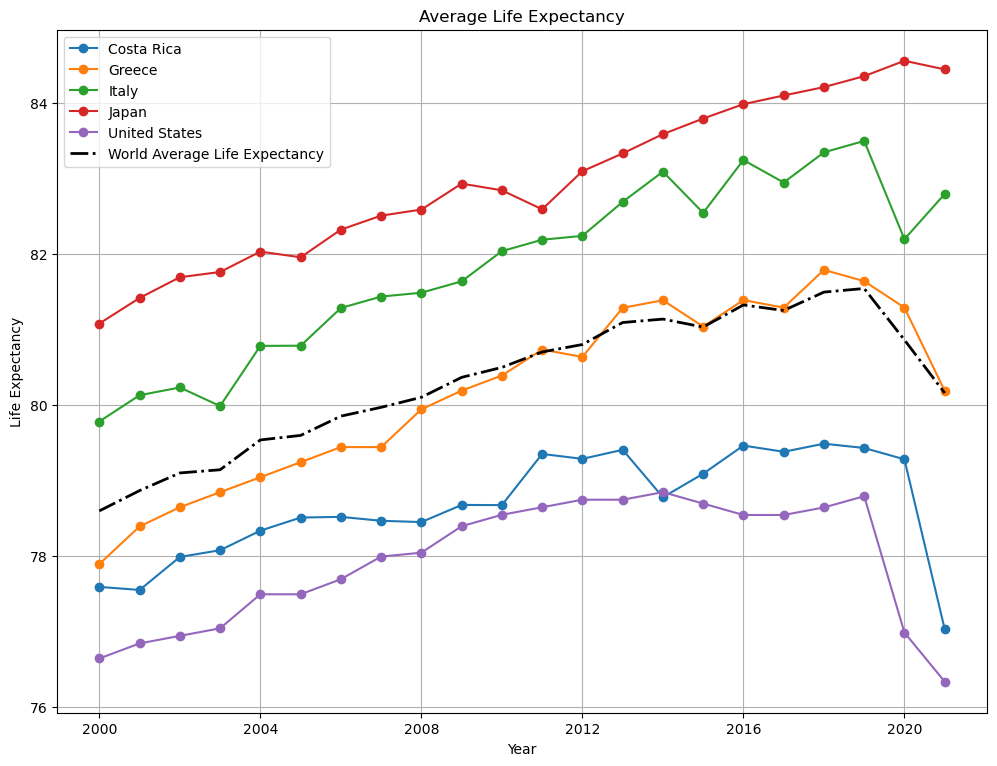

In [2]:
!pip install wbdata
!pip install matplotlib
!pip install --upgrade wbdata



import wbdata
import pandas as pd
import matplotlib.pyplot as plt

# Set the indicator code for life expectancy
indicator_code = 'SP.DYN.LE00.IN'
countries = ['USA', 'CRI', 'ITA', 'GRC', 'JPN']

 
data = wbdata.get_dataframe(indicators={indicator_code: "Life Expectancy"}, country=countries)
data.reset_index(inplace=True)


data['date'] = pd.to_datetime(data['date'])
data = data[data['date'].dt.year >= 2000]

df_pivot = data.pivot_table(values='Life Expectancy', index='date', columns='country')

# Calculate the average life expectancy for each year
df_pivot['average'] = df_pivot.mean(axis=1)

# Calculate the international average life expectancy 
international_average = df_pivot.mean(axis=1)

plt.figure(figsize=(12, 8.87))
for country in df_pivot.columns[:-1]:  
    plt.plot(df_pivot.index, df_pivot[country], marker='o', label=country)

plt.plot(df_pivot.index, international_average, color='black', linestyle='dashdot', linewidth=2, label='World Average Life Expectancy')
plt.title('Average Life Expectancy')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend()
plt.grid(True)
plt.show()

As you can see from the graph, Japan has the highest life expectancy at around 85 from the latest year in the data. When comparing this to the Okinawa diet and the cost per day that we attained through our minimization function, which was $40.05, the diets and lifestyles in Japan might be more sustainable and increase longevity. However, due to the high cost per day of the Okinawa diet with Berkeley prices, it is really unattainable to keep up with. 

Now looking at the difference between the US and Greece, Greece has a high life expectancy than the US by around 5 years. This could be due to a lot of factors as the graph or the general information does not give us reasons as to why some life expectancies are higher than others, but diet is definitely one factor that could be pointed out and attested to through the Blue Zones. Given that Greece's life expectancy is higher and the cost per diet for the Mediterranean diet is cheaper than the generic Berkeley diet, it might be worth while for Berkeley students to follow the Mediterranean for the chance at a longer and healthier life.

## Conclusion

According to our functions, the diet with the lowest cost per day is the Mediterranean diet at $6.10 for a male ages 19-30, which covers the age range of a typical college student. This means that this diet is more feasible in terms of price in comparsion to both the Generic and Okinawa diets, favoring the ability to for typical Berkeley students to follow the Mediterranean diet and hopefully reap the benefits of its increaased longevity of life as seen by the people of Ikaria, Greece.

Of course, the people of the Blue Zone's life expectancy is also based on other outside factors and confounding variables such as the overall culture, community, exercise, individual genetics, etc. So we cannot make the claim that Berkeley students who follow this diet would cause longer, healthier lives, but we can conclude that the Blue Zone Mediteranean diet is by far the cheapest per day and the healthiest given the constraints in comparison to the other diets.

Secondly, there are some limitations that should be awknowledged or elements in the data that we could not account for. This includes inconsisent mutrient information based on the certain APIs as not all the data for a certain food item was not inputted in the API key, as there seemed to be a lot of NaN elements, which ultimately could have affected the results of the minimization function.

Ultimately, we did reach our goal in discovering if a Blue Zone diet would be feasible in Berkeley, which has the ability to prove that healthier diet options due exist at a lower cost and provide long-term health benefits.